In [1]:
import numpy as np
from skgstat import Variogram, OrdinaryKriging
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

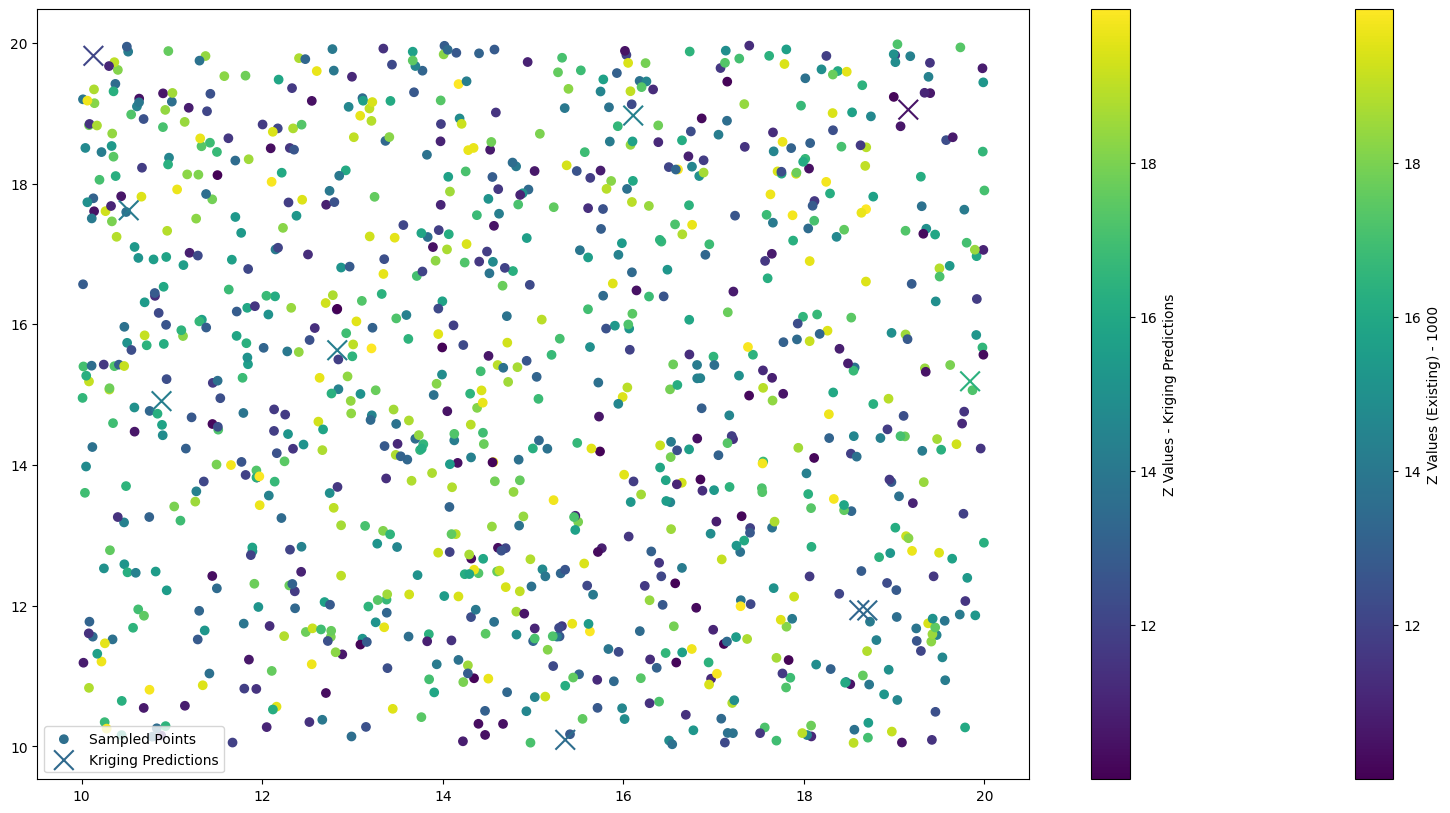

In [22]:
i_figure=1

# Example data
a = 10  # lower bound
b = 20  # upper bound

x1 = a + (b - a) * np.random.rand(1000)  # replace with your actual x1 values
y1 = a + (b - a) * np.random.rand(1000)  # replace with your actual y1 values
z1 = a + (b - a) * np.random.rand(1000)  # replace with your actual z values

x2 = a + (b - a) * np.random.rand(10)  # replace with your actual x2 values
y2 = a + (b - a) * np.random.rand(10)  # replace with your actual y2 values

# Create a variogram model
variogram_model = Variogram(np.vstack((x1, y1)).T, z1)

# Use the variogram model for ordinary kriging
ok = OrdinaryKriging(variogram_model, min_points=3, max_points=5, mode='exact')

field = ok.transform(x2, y2)

plt.figure(i_figure, figsize=(20, 10))

norm = Normalize(vmin=min(np.min(z1), np.min(field)), vmax=max(np.max(z1), np.max(field)))

# Plotting the results
scatter1 = plt.scatter(x1, y1, c=z1, norm=norm, marker='o', label='Sampled Points')
scatter2 = plt.scatter(x2, y2, c=field, norm=norm, marker='x', s=200, label='Kriging Predictions')


# scatter1=plt.scatter(x1, y1, c=z1,marker='o', label='Sampled Points')
# scatter2=plt.scatter(x2, y2, c=field, marker='x', label='Kriging Predictions')

sample_label = 'Z Values (Existing) - ' + str(len(x1))
kriging_label = 'Z Values (Kriging) - ' + str(len(x2))

cbar = plt.colorbar(scatter1, label=sample_label)
cbar2 = plt.colorbar(scatter2, label=kriging_label)
plt.legend()

plt.savefig("kriging_visuals/figure_" + str(i_figure) + ".png", format='png', dpi=200)

plt.show()


In [ ]:
i_figure=1
plt.figure(i_figure)
# norm = Normalize(vmin=min(np.min(z1), np.min(field)), vmax=max(np.max(z1), np.max(field)))
# Plotting the results
scatter1=plt.scatter(x1, y1, c=z1,norm=norm,marker='o', label='Sampled Points')
scatter2=plt.scatter(x2, y2, c=field,norm=norm, marker='x', label='Kriging Predictions')

cbar = plt.colorbar(scatter1, label='Z Values')
cbar2 = plt.colorbar(scatter2, label='Z Values')
plt.legend()
plt.show()
plt.savefig("figure_"+str(i_figure)+str(".png"), format='png', dpi=200)